При попощи вейвлета нужно повторить результат на экг сигнале

In [55]:
import numpy as np
import pandas as pd
import pywt
import torch
import torch.nn as nn
from scipy import signal
from scipy import optimize
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import Image
from matplotlib.pyplot import figure

In [56]:
data = pd.read_csv('ecg.csv')

In [57]:
data.head()

,Unnamed: 0,MLII
0,0,995
1,1,995
2,2,995
3,3,995
4,4,995


In [58]:
columns = data.columns
ecg = data[columns[1]]
print(len(ecg))

20000


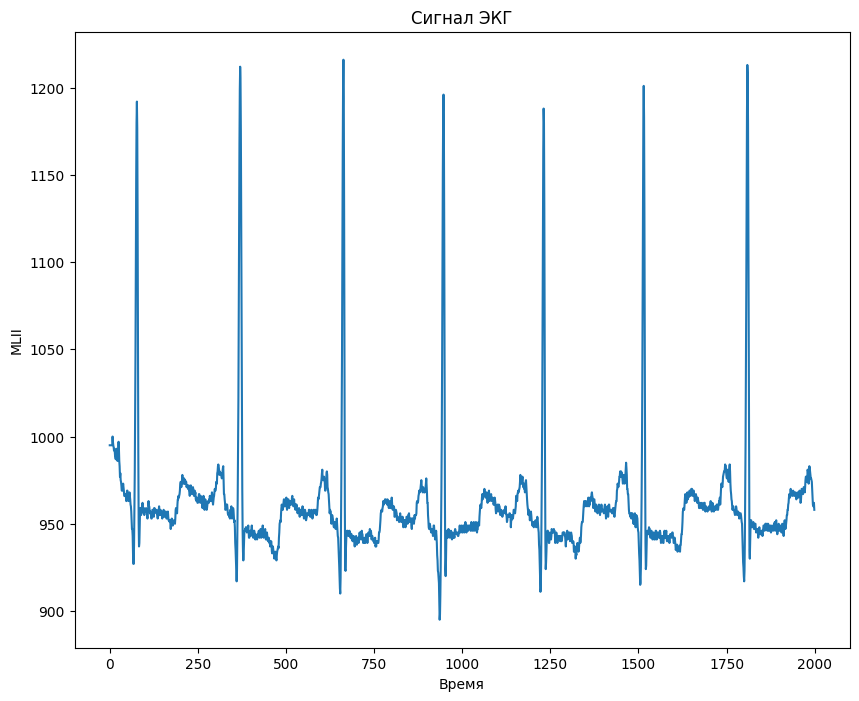

In [59]:
figure(figsize=(10, 8))
plt.title('Сигнал ЭКГ')
plt.xlabel('Время')
plt.ylabel('MLII')
plt.plot(ecg[0:2000])

In [60]:
time = data[columns[0]][0:5000]/360
ECG = ecg[0:5000]

Text(0, 0.5, 'MLII')

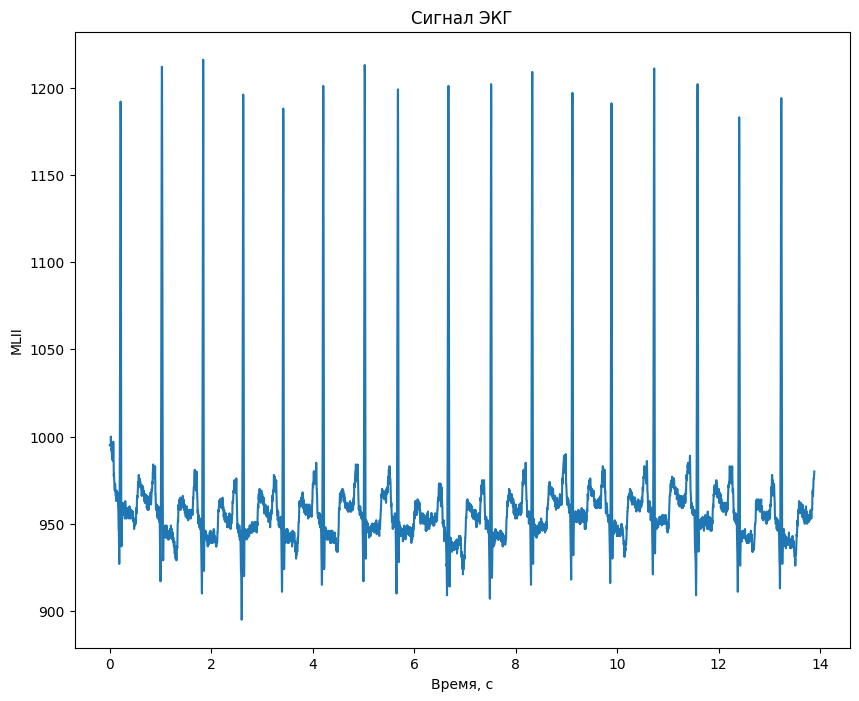

In [61]:
figure(figsize=(10, 8))
plt.plot(time, ECG)
plt.title('Сигнал ЭКГ')
plt.xlabel('Время, c')
plt.ylabel('MLII')

In [62]:
#вычисляем ширину окна вейвлета
w = 6
freq = np.linspace(1, 360/2, 3250)
widths = w*360 / (2*freq*np.pi)

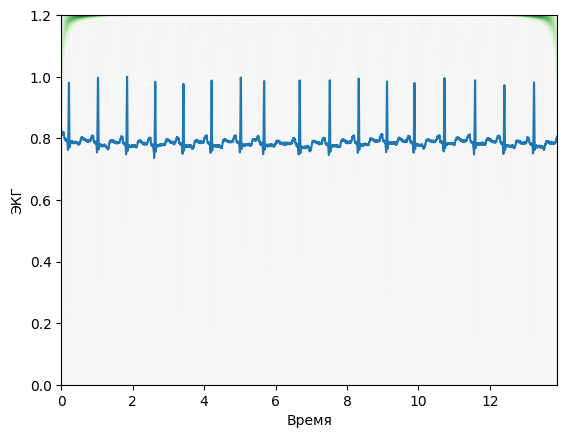

In [63]:
coefs, freqs = pywt.cwt(ECG, widths, wavelet = 'mexh') #используем вейвлет мексиканская шляпа
plt.xlabel('Время')
plt.ylabel('ЭКГ')
plt.imshow(
    coefs,
    extent = [0, time[4999], 0, 1.2],
    cmap = "PRGn",
    aspect = "auto",
    vmax = abs(coefs).max(),
    vmin = -abs(coefs).max(),
);
plt.plot(time, ECG / np.abs(ECG).max()) #нормализованный сигнал

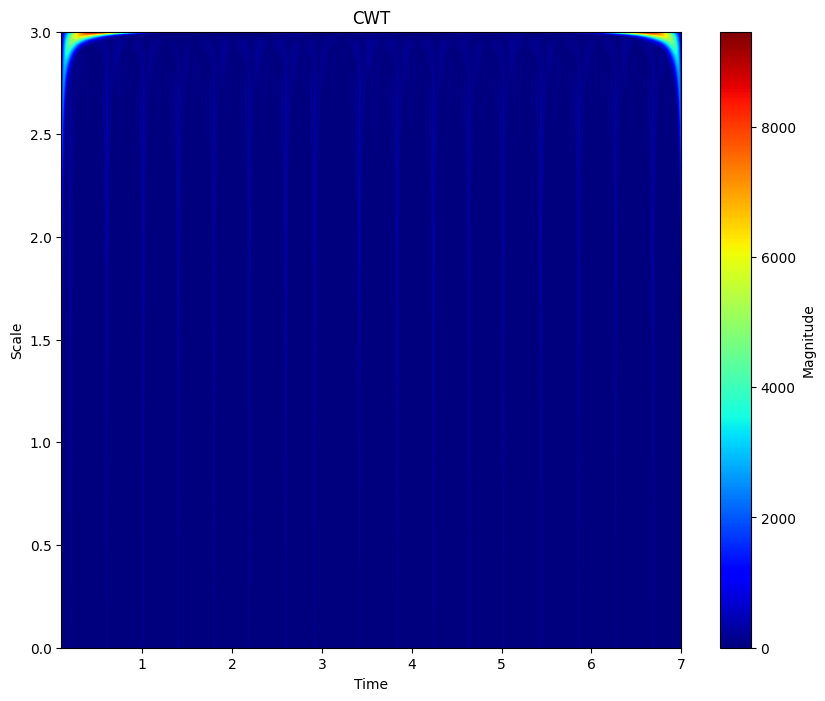

In [64]:
# Построение спектра
plt.figure(figsize = (10, 8))
plt.imshow(np.abs(coefs), aspect = 'auto', cmap = 'jet', extent = [0.1, 7, 0, 3])
plt.colorbar(label = "Magnitude")
plt.ylabel("Scale")
plt.xlabel("Time")
plt.title("CWT")
plt.show()

In [65]:
0

0